In [1]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

---
###

### Adult education level
    - measured as a percentage of same age population

In [2]:
#-- oecd file
level_edu_data_to_load = "Resources/Adult_edu_level.csv"

edu_level_complete= pd.read_csv(level_edu_data_to_load)#,index_col=0)
edu_level_complete.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2000,41.212311,NaN
1,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2001,41.076141,NaN
2,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2002,39.050316,NaN
3,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2003,37.519817,NaN
4,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2004,35.879036,NaN


In [3]:
edu_level_complete=edu_level_complete.drop(['Flag Codes'],axis=1)
edu_level_complete

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2000,41.212311
1,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2001,41.076141
2,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2002,39.050316
3,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2003,37.519817
4,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2004,35.879036
...,...,...,...,...,...,...,...
2282,G20,EDUADULT,BUPPSRY,PC_25_64,A,2011,36.556688
2283,G20,EDUADULT,TRY,PC_25_64,A,2010,28.207440
2284,G20,EDUADULT,TRY,PC_25_64,A,2011,27.866679
2285,G20,EDUADULT,UPPSRY,PC_25_64,A,2010,36.839818


In [4]:
# -- reduce to 2009-2018 only
edu_level_reducetime=edu_level_complete[(edu_level_complete['TIME']>=2009)&(edu_level_complete['TIME']<=2018)]

edu_level_reducetime


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
9,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2009,28.972523
10,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2010,26.792744
11,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2011,25.922543
12,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2012,23.563389
13,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2013,24.284430
...,...,...,...,...,...,...,...
2282,G20,EDUADULT,BUPPSRY,PC_25_64,A,2011,36.556688
2283,G20,EDUADULT,TRY,PC_25_64,A,2010,28.207440
2284,G20,EDUADULT,TRY,PC_25_64,A,2011,27.866679
2285,G20,EDUADULT,UPPSRY,PC_25_64,A,2010,36.839818


In [5]:


country_list=['HUN', 'POL', 'MEX', 'SWE', 'FRA', 'NOR', 'ISL', 'LVA', 'EST',
        'CHE', 'BEL', 'ISR', 'CAN', 'NZL', 'IRL', 'CHL', 'ESP', 'FIN',
       'LUX', 'KOR', 'GBR', 'AUS', 'NLD', 'TUR', 'GRC', 'AUT', 'DNK',
       'SVK', 'SVN', 'JPN', 'CZE', 'DEU', 'PRT', 'ITA', 'LTU', 'USA']

In [7]:
edu_level_clean=edu_level_reducetime[edu_level_reducetime['LOCATION'].isin(country_list)]

edu_level_clean.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
9,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2009,28.972523
10,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2010,26.792744
11,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2011,25.922543
12,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2012,23.563389
13,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2013,24.284430


In [8]:
#export to csv
edu_level_clean.to_csv("output_data/df_edu_level_oecd.csv")


* There are three levels of education:
    * below upper-secondary ('BUPPSRY'),
    * upper secondary ('UPPSRY') and
    * tertiary education ('TRY').    

In [10]:
edu_level_clean['SUBJECT'].unique()

array(['BUPPSRY', 'TRY', 'UPPSRY'], dtype=object)

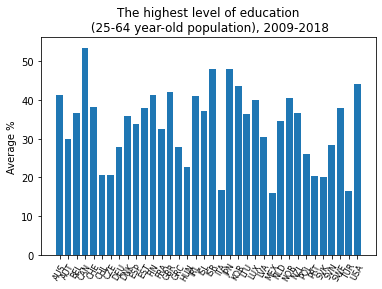

<Figure size 432x288 with 0 Axes>

In [20]:
# the highest level of education

fig1, ax1=plt.subplots()

x=np.arange(len(edu_level_clean['LOCATION'].unique()))
y=edu_level_clean[edu_level_clean['SUBJECT']=='TRY'].groupby(['LOCATION'])['Value'].mean()

plt.bar(x,y)

tick_label=edu_level_clean['LOCATION'].sort_values().unique()
plt.xticks(np.arange(0,36,1), tick_label, fontsize=8, rotation=60)
plt.title("The highest level of education\n (25-64 year-old population), 2009-2018")
#plt.xlabel("Countries")
plt.ylabel("Average %")


plt.show()
plt.tight_layout()

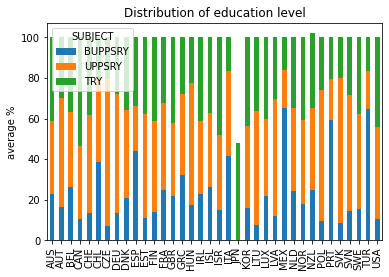

<Figure size 432x288 with 0 Axes>

In [19]:
# distribution
df=edu_level_clean.groupby(['LOCATION','SUBJECT'])['Value'].mean().unstack('SUBJECT').fillna(0)
df[['BUPPSRY','UPPSRY','TRY']].plot(kind='bar',stacked=True)

plt.title("Distribution of education level")
plt.xlabel("")
plt.ylabel("average %")

plt.show()
plt.tight_layout()

In [13]:
# --?? 
edu_level_clean[edu_level_clean['LOCATION']=='JPN'] # Japan has TRY only

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
819,JPN,EDUADULT,TRY,PC_25_64,A,2009,43.764038
820,JPN,EDUADULT,TRY,PC_25_64,A,2010,44.809975
821,JPN,EDUADULT,TRY,PC_25_64,A,2011,46.364063
822,JPN,EDUADULT,TRY,PC_25_64,A,2012,46.619377
823,JPN,EDUADULT,TRY,PC_25_64,A,2013,47.311993
824,JPN,EDUADULT,TRY,PC_25_64,A,2014,48.185074
825,JPN,EDUADULT,TRY,PC_25_64,A,2015,49.541573
826,JPN,EDUADULT,TRY,PC_25_64,A,2016,50.496956
827,JPN,EDUADULT,TRY,PC_25_64,A,2017,51.440529
828,JPN,EDUADULT,TRY,PC_25_64,A,2018,51.928062


In [14]:
# region filters
west_f=['GBR', 'ESP', 'AUT', 'FRA', 'DEU', 'IRL', 'CHE', 'ITA', 'LUX', 'GRC', 'ISR'
                  'NLD', 'BEL', 'AUS', 'NZL', 'PRT', 'TUR', 'CAN']
east_f=['EST', 'CZE', 'LVA', 'LTU', 'HUN', 'SVK', 'SVN', 'POL'] 
scand_f = ['NOR', 'FIN' ,'ISL', 'SWE', 'DNK']
us_f = ['USA']
asia_f = ['KOR', 'JPN']
latin_f = ['MEX', 'CHL']

In [15]:
#-- west
edu_level_west=edu_level_clean[edu_level_clean['LOCATION'].isin(west_f)]
edu_level_west.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
9,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2009,28.972523
10,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2010,26.792744
11,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2011,25.922543
12,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2012,23.563389
13,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2013,24.284430


In [16]:
west_gr_ter=edu_level_west[edu_level_west['SUBJECT']=='TRY'].groupby(edu_level_west['LOCATION']).mean()
#west_gr_ter
west_gr_upsec=edu_level_west[edu_level_west['SUBJECT']=='UPPSRY'].groupby(edu_level_west['LOCATION']).mean()

west_gr_bsec=edu_level_west[edu_level_west['SUBJECT']=='BUPPSRY'].groupby(edu_level_west['LOCATION']).mean()



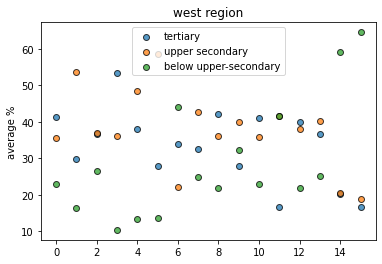

In [17]:
# #-- west region
# fig1, ax1 =plt.subplots()

# x1=np.arange(len(west_gr_ter['TIME']))
# y1=west_gr_ter['Value']
# s1=plt.scatter(x1,y1, edgecolors="black", alpha=0.75)

# x2=np.arange(len(west_gr_upsec['TIME']))
# y2=west_gr_upsec['Value']
# s2=plt.scatter(x2,y2, edgecolors="black", alpha=0.75)

# x3=np.arange(len(west_gr_bsec['TIME']))
# y3=west_gr_bsec['Value']
# s3=plt.scatter(x3,y3, edgecolors="black", alpha=0.75)

# plt.legend([s1,s2,s3],['tertiary','upper secondary','below upper-secondary'])
# plt.title("west region")
# plt.ylabel("average %")

# plt.show()

In [18]:
# # --usa
# edu_level_usa=edu_level_clean[edu_level_clean['LOCATION'].isin(us_f)]
# #edu_level_usa.head()

In [ ]:
# edu levels